<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/kmeans_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple demonstration of k-means

## A simple implementation

* adapted from

[ISLP book k-means code](https://github.com/intro-stat-learning/ISLP_labs/blob/stable/Ch12-unsup-lab.ipynb)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [17]:
np.random.seed(0);
X = np.random.standard_normal((50,2));
X[:25,0] += 3;
X[:25,1] -= 4;

## Perform k-means clustering with $K = 2$

In [18]:
kmeans = KMeans(n_clusters=2,
                random_state=2,
                n_init=20).fit(X)

## The cluster assignments of the 50 observations are contained in *kmeans.labels_*

In [19]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

## Plot the data, with each observation colored according to its cluster assignment.

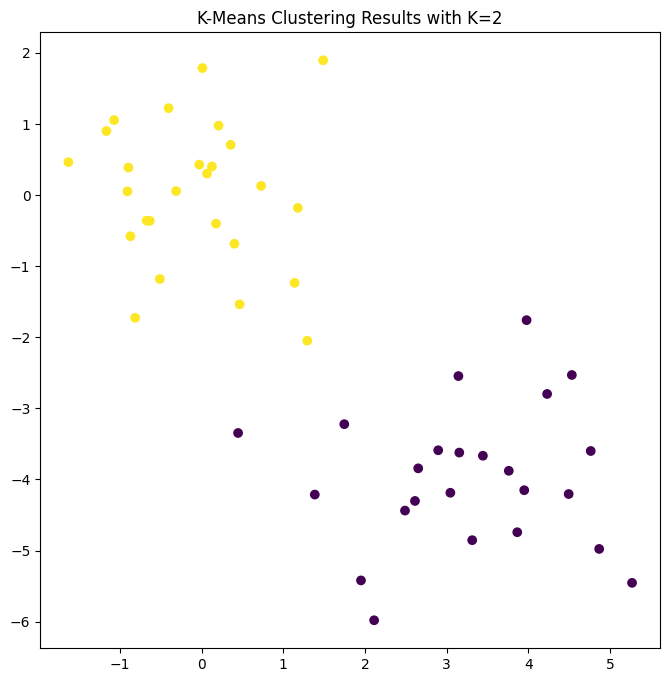

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");

## Exercise

* Try k-means with $K = 3$ and $K = 4$
* Try running k-means without the *random_state = 2*
* ```py
kmeans = KMeans(n_clusters=4,
                n_init=20).fit(X)
```

## Alternative implementation

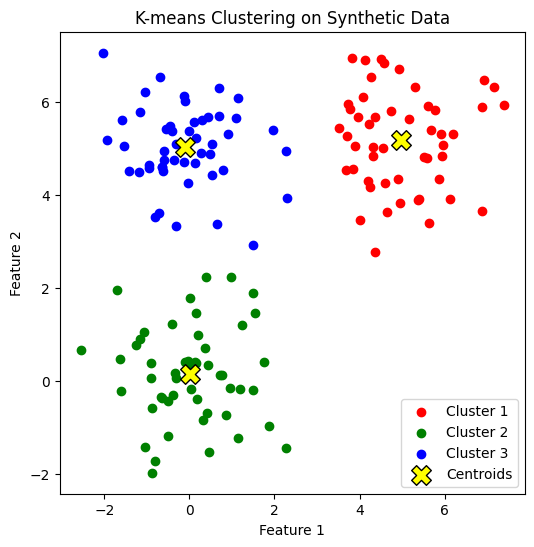

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate synthetic data
np.random.seed(0)
X = np.vstack([
    np.random.randn(50, 2) + np.array([0, 0]),
    np.random.randn(50, 2) + np.array([5, 5]),
    np.random.randn(50, 2) + np.array([0, 5])
])

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Plot
plt.figure(figsize=(6, 6))
colors = ['r', 'g', 'b']
for i in range(3):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='yellow', s=200, marker='X', edgecolor='k', label='Centroids')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering on Synthetic Data')
plt.show()

## Evaluate clusters using the within-cluster similarity

Find the optimal value of the number of clusters $K$.

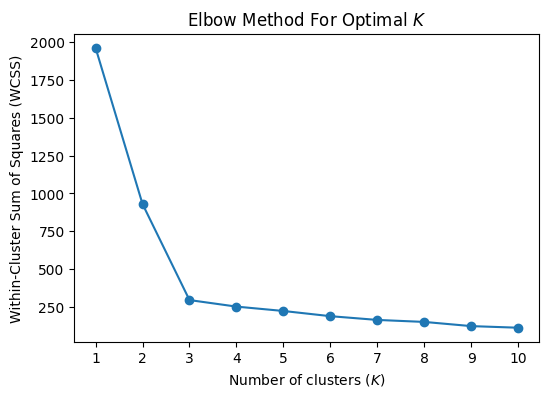

In [22]:
# Plot WCSS (inertia) as a function of the number of clusters
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of clusters ($K$)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal $K$')
plt.xticks(K_range)
plt.show()

## References

* https://www.statlearning.com/
* https://www.youtube.com/playlist?list=PLoROMvodv4rNHU1-iPeDRH-J0cL-CrIda
* [Video lectures by the authors of the book Introduction to Statistical Learning in Python](https://www.youtube.com/playlist?list=PLoROMvodv4rNHU1-iPeDRH-J0cL-CrIda)
